In [1]:
import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/nyc.csv')
agent = stats.formulas(df)

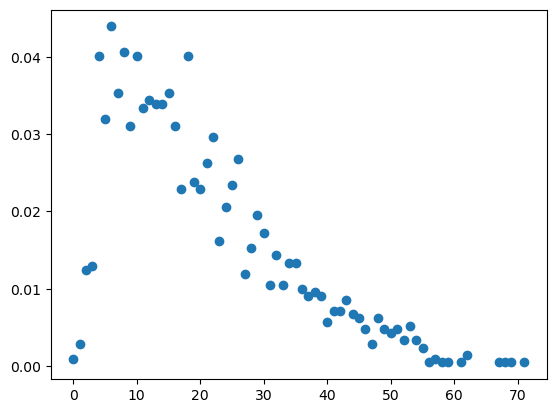

In [2]:
# pdf
agent.pdf('Poverty',0)
plt.scatter(agent.vals,agent.probVector)

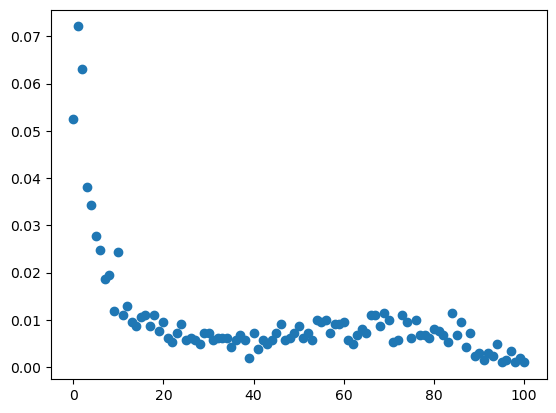

In [3]:
agent.pdf('White',0)
plt.scatter(agent.vals,agent.probVector)

/Users/kjames/Desktop/generalized_model/notebooks/stats.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['node'] = nodeList


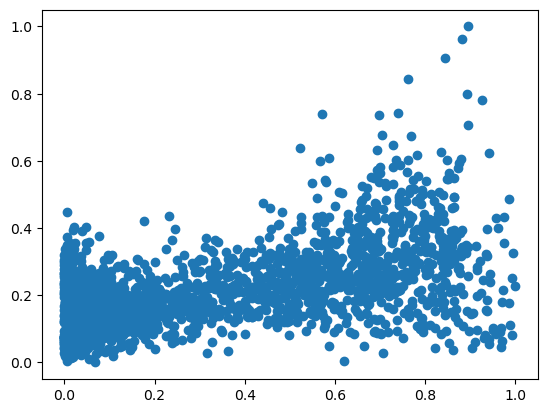

In [4]:
# KNN
agent.set_x_y('White','Income')
agent.init_knn('County')
location = agent.scatterGraphNorm
testNode = agent.nodeList[200]
agent.insert_knn(testNode)
plt.scatter(location[0], location[1])

In [5]:
# agent.graph[(testNode.x,testNode.y)].append(testNode)
# x = agent.df['node'].tolist()
# agent.knn_predict(x)

m = -0.1824739124121692 
b = 25.550393978858015


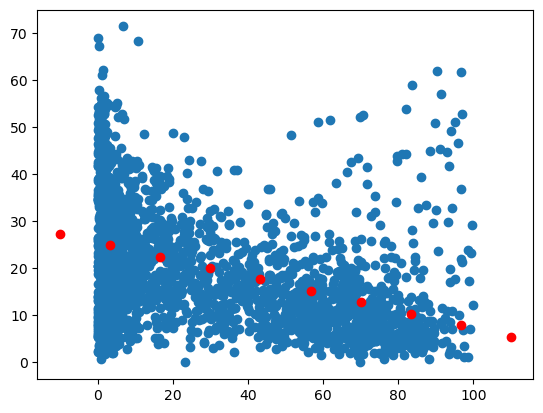

m = 0.06009790832789186 
b = 18.120197448809314


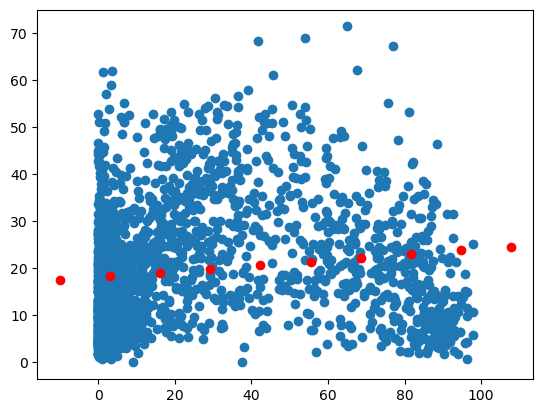

m = -0.0031803187359826677 
b = 13.689999826918369


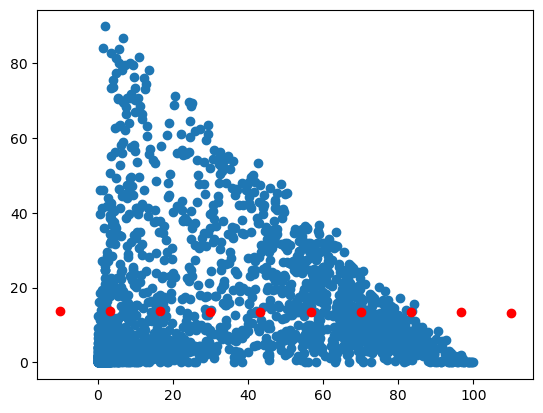

array([13.72180301, 13.67939876, 13.63699451, 13.59459026, 13.55218602,
       13.50978177, 13.46737752, 13.42497327, 13.38256902, 13.34016477])

In [6]:
# linear regression
agent.set_x_y('White', 'Poverty')
agent.linear_regression()
agent.set_x_y('Black', 'Poverty')
agent.linear_regression()
agent.set_x_y('White', 'Asian')
agent.linear_regression()

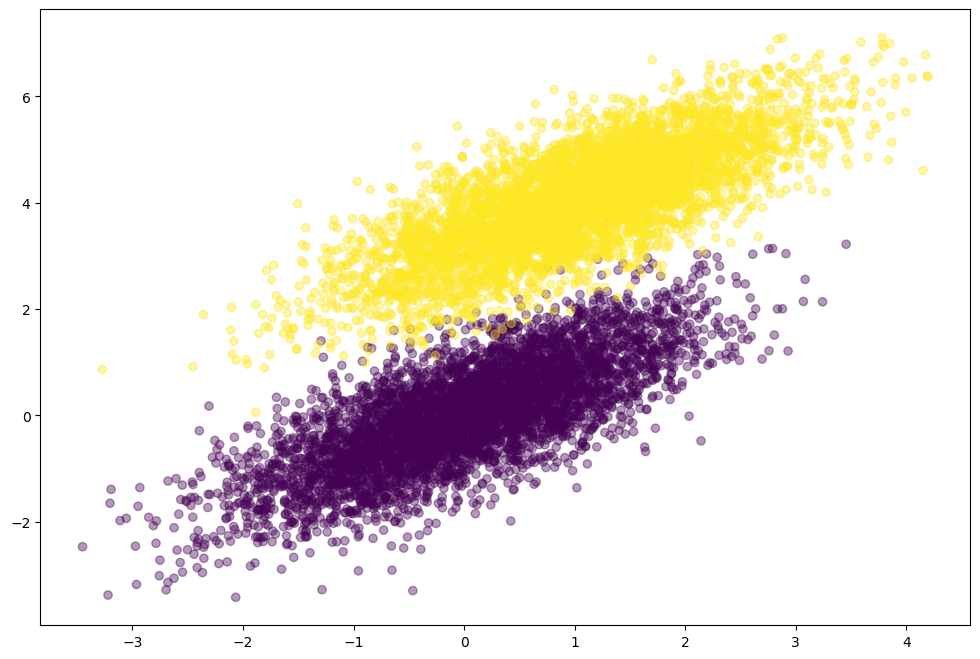

In [7]:
# logistic regression
# Set up data
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)


In [10]:

#dataToProcess = [features,labels]
agent.prepare_log_reg()
agent.log_df.head(5)

# fig, ax = plt.subplots()
# for i in range(len(x)):
#     ax.scatter(x[i], y[i], marker=shapes[labels[i]])

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# plt.show()






,x,y,label
0,-1.049486,0.878644,1
1,0.878099,0.895511,0
2,0.959288,1.039673,0
3,-1.180134,1.120622,1
4,-0.907318,1.060409,1


In [9]:
agent.prepare_log_reg('White','')
agent.logistic_regression()

TypeError: prepare_log_reg() takes from 1 to 2 positional arguments but 3 were given